# Machine Learning II

## Выбросы и робастная регрессия

### Генерируем обычные значения: люди среднего телосложения

In [ ]:
import random

# Генерация списка из 100 случайных чисел в диапазоне от 150 до 200
x1 = [random.randint(150, 200) for _ in range(100)]

print(x1)

[188, 157, 194, 195, 157, 161, 163, 168, 181, 184, 176, 170, 160, 158, 173, 193, 169, 199, 159, 157, 191, 185, 152, 158, 191, 160, 194, 190, 172, 184, 179, 154, 151, 189, 174, 171, 163, 195, 167, 152, 153, 168, 194, 181, 151, 194, 157, 185, 158, 153, 195, 161, 175, 166, 186, 160, 174, 174, 196, 194, 188, 192, 167, 169, 159, 186, 184, 177, 179, 189, 164, 162, 186, 200, 182, 196, 150, 186, 176, 171, 197, 191, 171, 181, 167, 189, 169, 186, 195, 193, 165, 167, 162, 178, 182, 162, 193, 197, 168, 188]


In [ ]:
import matplotlib.pyplot as plt

(array([ 8.,  9., 11., 12.,  9.,  7.,  8., 13., 13., 10.]),
 array([150., 155., 160., 165., 170., 175., 180., 185., 190., 195., 200.]),
 <BarContainer object of 10 artists>)

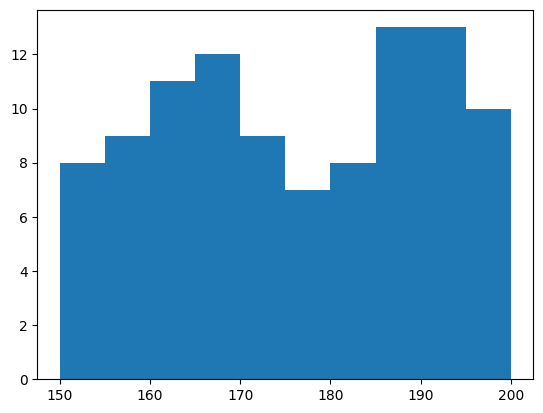

In [ ]:
plt.hist(x1)

In [ ]:
y1 = [x - 100 + random.randint(-10, 10) for x in x1]

print(y1)


[97, 55, 84, 94, 65, 63, 66, 76, 79, 87, 83, 60, 50, 62, 64, 86, 70, 97, 61, 53, 92, 92, 51, 66, 93, 50, 100, 98, 73, 80, 80, 56, 60, 93, 64, 71, 58, 102, 65, 57, 63, 60, 84, 72, 60, 87, 60, 77, 59, 57, 101, 53, 77, 70, 78, 68, 84, 66, 105, 98, 78, 92, 66, 79, 65, 79, 83, 71, 87, 79, 68, 71, 76, 107, 85, 103, 59, 79, 77, 69, 96, 95, 61, 73, 72, 87, 62, 92, 101, 98, 71, 77, 62, 78, 86, 59, 93, 96, 71, 89]


(array([ 6., 14., 14., 12., 11., 12.,  8.,  9., 10.,  4.]),
 array([ 50. ,  55.7,  61.4,  67.1,  72.8,  78.5,  84.2,  89.9,  95.6,
        101.3, 107. ]),
 <BarContainer object of 10 artists>)

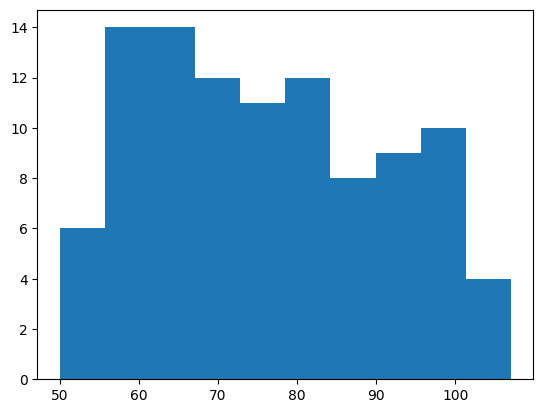

In [ ]:
plt.hist(y1)

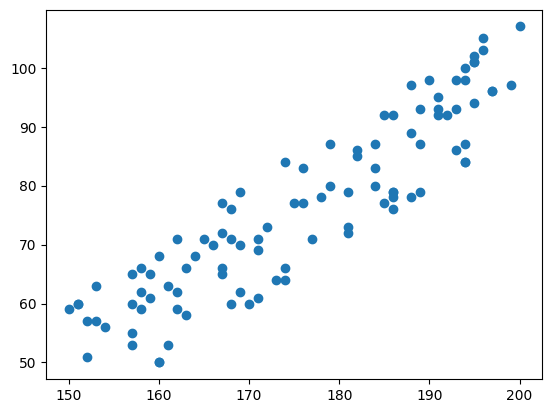

In [ ]:
plt.scatter(x1, y1)
plt.show()

### Линейная регрессия по МНК

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# Данные x1 и y1
x1 = np.array(x1).reshape(-1, 1)
y1 = np.array(y1)

In [ ]:
x1.shape

(100, 1)

In [ ]:
y1.shape

(100,)

In [ ]:
# Инициализация модели линейной регрессии
model = LinearRegression()

# Обучение модели на данных (используем только соответствующие точки)
model.fit(x1, y1)

LinearRegression()

In [ ]:
# Предсказание значений y с использованием обученной модели
y_predict = model.predict(x1)

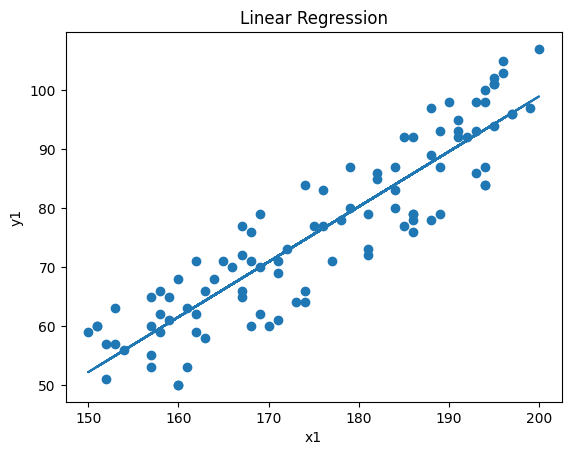

In [ ]:
# Построение графика
plt.scatter(x1, y1)  # Точки данных
plt.plot(x1, y_predict)  # Линия регрессии
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Linear Regression')
plt.show()


### Генерируем выбросы: "худощавые марафонцы"

In [ ]:
x2 = [190 + random.randint(-10, 10) for _ in range(20)]
y2 = [60  + random.randint(-10, 10) for _ in range(20)]

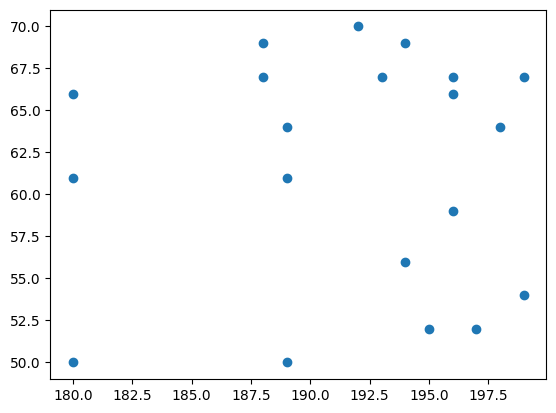

In [ ]:
plt.scatter(x2, y2)

In [ ]:
type(x2)

list

In [ ]:
x1 = [random.randint(150, 200) for _ in range(100)]
y1 = [x - 100 + random.randint(-10, 10) for x in x1]

### Объединяем оба списка: "средние" + "марафонцы"

In [ ]:
x = x1 + x2
y = y1 + y2

In [ ]:
type(x)

list

In [ ]:
len(x)

120

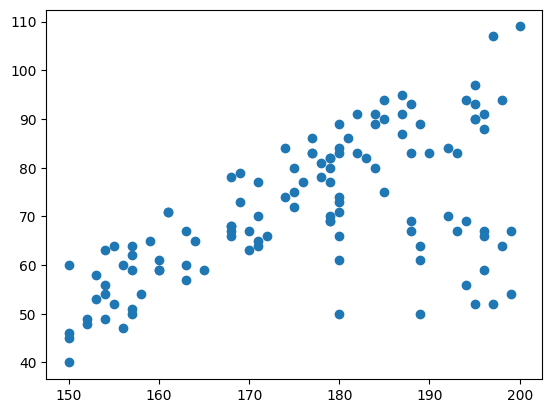

In [ ]:
plt.scatter(x, y)

In [ ]:
x = np.array(x).reshape(-1, 1)
y = np.array(y)

In [ ]:
model.fit(x, y)

LinearRegression()

In [ ]:
y_predict = model.predict(x)

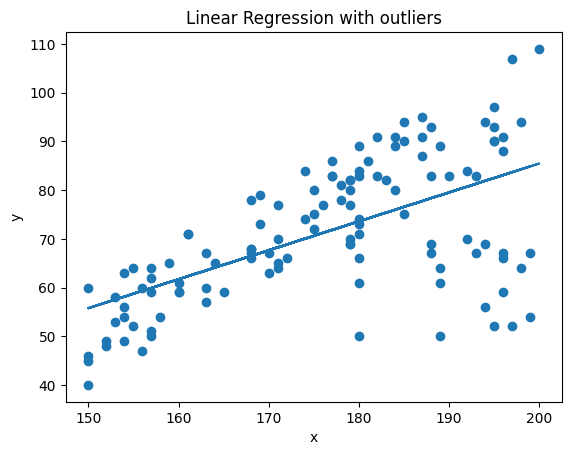

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_predict)  # Линия регрессии
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with outliers')
plt.show()


### Робастная регрессия: три модели SKLearn

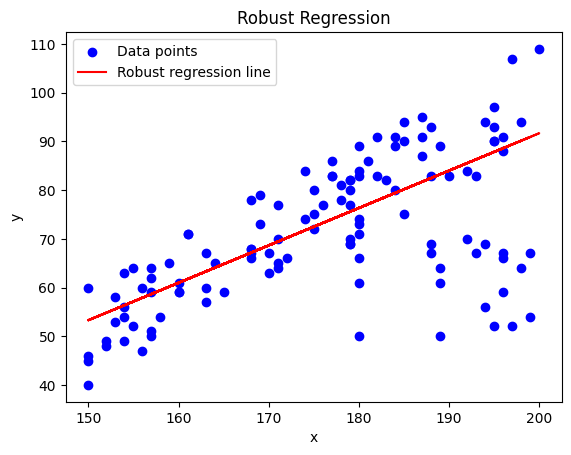

In [ ]:
from sklearn.linear_model import HuberRegressor

# Инициализация модели робастной регрессии
model_2 = HuberRegressor()

# Обучение модели на данных
model_2.fit(x, y)

# Предсказание значений y с использованием обученной модели
y_robust = model_2.predict(x)

# Построение графика
plt.scatter(x, y, color='blue', label='Data points')  # Точки данных
plt.plot(x, y_robust, color='red', label='Robust regression line')  # Линия регрессии
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Robust Regression')
plt.show()


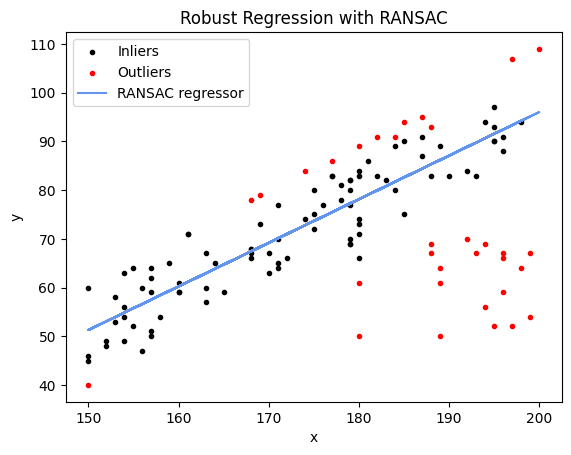

In [ ]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(x, y)

# Получение маски инлайеров
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Предсказание значений y с использованием обученной модели
predicted_y = ransac.predict(x)

# Построение графика
plt.scatter(x[inlier_mask], y[inlier_mask], color='black', marker='.', label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask], color='red', marker='.', label='Outliers')
plt.plot(x, predicted_y, color='cornflowerblue', label='RANSAC regressor')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Robust Regression with RANSAC')
plt.show()


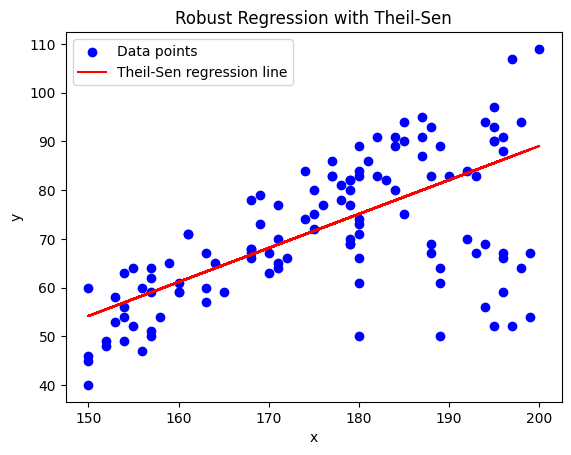

In [ ]:
from sklearn.linear_model import TheilSenRegressor
# Инициализация модели Theil-Sen
model = TheilSenRegressor()

# Обучение модели на данных
model.fit(x, y)

# Предсказание значений y с использованием обученной модели
predicted_y = model.predict(x)

# Построение графика
plt.scatter(x, y, color='blue', label='Data points')  # Точки данных
plt.plot(x, predicted_y, color='red', label='Theil-Sen regression line')  # Линия регрессии
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Robust Regression with Theil-Sen')
plt.show()


© Арьков В.Ю.